# roAp Classification using regression techniques with K-Nearest-Neighbors (KNN):

### Updates:
        initial: (03/2/2023)

In [2]:
from sklearn import neighbors, datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import gaussian_kde

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1. Importing csv files containing NGC 2264 and known roAps
        'roAp' is the csv file including the field roAps
        'clust' is the csv file including NGC 2264 cluster stars 

In [3]:
r = pd.read_csv('Data/field_roAp.csv', index_col=False)
c = pd.read_csv('Data/15MON_A0_FOV.csv', index_col=False)
rfeat = r.columns
cfeat = c.columns

roAp = pd.DataFrame(r)
clust = pd.DataFrame(c)
dbr = np.append(np.array(roAp), np.array(roAp), axis=1)
dbc = np.append(np.array(clust), np.array(clust), axis=1)
# Concatenating datasets to find roAp condidates in NGC 2264
all = pd.concat([roAp, clust])
all['designation'] = all['designation'].str.replace(r'\D', '')
db = np.append(np.array(all),np.array(all),axis=1)
# Extracting features of all datasets
yr = list(roAp['GMAG0'])
yc = list(clust['GMAG0'])
xr = list(roAp['BP-RP0'])
xc = list(clust['BP-RP0'])
y = list(all['GMAG0'])
x = list(all['BP-RP0'])

print('Features:', len(yr))
print('Target:', len(yc))
print('---------')
print('Total Dataset for field roAps:', dbr.data.shape)
print('Total Dataset for NGC 2264:', dbc.data.shape)
print('Concatenated Dataset:',all.shape)
all.describe()

/tmp/ipykernel_8498/3648217732.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  all['designation'] = all['designation'].str.replace(r'\D', '')


Features: 93
Target: 965
---------
Total Dataset for field roAps: (93, 120)
Total Dataset for NGC 2264: (965, 172)
Concatenated Dataset: (1058, 90)


,num,id,ra,RA_ICRS,dec,DE_ICRS,GMAG0,BP-RP0,ecl_lon,ecl_lat,...,grvs_mag,grvs_mag_error,logg_gspphot,mh_gspphot,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_rp_mean_flux,phot_rp_mean_flux_error
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,...,127.000000,127.000000,846.000000,846.000000,9.650000e+02,965.000000,9.650000e+02,965.000000,9.650000e+02,965.000000
mean,0.087902,528.500000,109.151299,109.151289,7.478114,7.478106,3.442366,0.757858,109.771502,-13.118243,...,12.503708,0.073577,4.376956,-1.251781,2.165922e+04,74.888334,4.196140e+04,21.822412,2.990228e+04,77.776609
std,0.283286,305.562596,41.211886,41.211825,13.838901,13.838930,2.109317,0.467252,42.045784,12.764718,...,1.210838,0.063511,0.459858,1.033316,1.807347e+05,1115.473325,3.672976e+05,110.827438,2.778614e+05,1033.807892
min,0.000000,0.000000,2.127157,2.127157,-81.902104,-81.902104,-2.724406,-0.274474,2.019759,-85.377605,...,7.257843,0.005903,1.560400,-4.080400,9.493662e+01,5.431366,7.524995e+02,1.351323,7.388467e+02,6.360226
25%,0.000000,264.250000,100.119403,100.119403,9.797506,9.797506,2.154758,0.536962,100.236203,-13.265848,...,12.066604,0.029815,4.194500,-1.636250,3.390643e+02,11.071645,1.269774e+03,2.042505,1.384733e+03,12.372756
50%,0.000000,528.500000,100.244704,100.244704,9.920538,9.920538,3.409107,0.713893,100.364398,-13.137302,...,12.808246,0.062369,4.455300,-1.098800,6.898837e+02,14.236284,2.602011e+03,2.892261,2.781346e+03,15.658791
75%,0.000000,792.750000,100.431403,100.431403,10.019111,10.019111,4.361791,0.921099,100.558289,-13.049704,...,13.332334,0.105035,4.713975,-0.429025,2.274583e+03,20.523827,7.898782e+03,6.651048,8.173050e+03,24.481014
max,1.000000,1057.000000,348.317184,348.305087,58.526905,58.526905,13.284124,3.569711,336.146049,69.335987,...,14.090522,0.507102,5.158000,0.635400,4.076147e+06,34367.074000,9.490580e+06,2162.942900,7.721012e+06,31803.912000


#### Plotting the initial HRD with the field roAps and NGC 2264

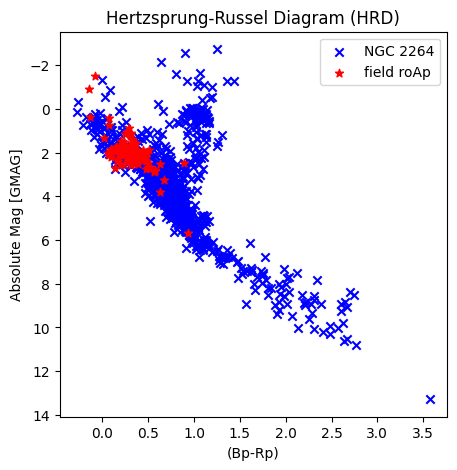

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x=xc,y=yc,marker='x', c='b', label='NGC 2264')
plt.scatter(x=xr,y=yr,marker='*', c='r', label='field roAp')
plt.legend()
plt.title('Hertzsprung-Russel Diagram (HRD)')
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('(Bp-Rp)')
plt.gca().invert_yaxis()

### 2. Splitting the data to be used for training and showing the sizes

In [5]:
column = 0

# Splitting data 80:20

xtrain, xtest, ytrain, ytest = train_test_split(db[:,np.newaxis,8],
                                                db[:,7],train_size=0.8)

xtrain_r, xtest_r, ytrain_r, ytest_r = train_test_split(dbr[:,np.newaxis,8],
                                                        dbr[:,7],train_size=0.8)

xtrain_c, xtest_c, ytrain_c, ytest_c = train_test_split(dbc[:,np.newaxis,8],
                                                        dbc[:,7],train_size=0.8)

scalar = preprocessing.StandardScaler().fit(xtrain)
xtrain = scalar.transform(xtrain)
xtest = scalar.transform(xtest)

print(f"roAp->\nTrain: {xtrain_r.shape}, Label: {ytrain_r.shape}")
print(f"Test: {xtest_r.shape}, Label: {ytest_r.shape}")
print('-----------------')
print(f"cluster->\nTrain: {xtrain_c.shape}, Label: {ytrain_c.shape}")
print(f"Test: {xtest_c.shape}, Label: {ytest_c.shape}")
print('-----------------')
print(f"Concat->\nTrain: {xtrain.shape}, Label: {ytrain.shape}")
print(f"Test: {xtest.shape}, Label: {ytest.shape}")

roAp->
Train: (74, 1), Label: (74,)
Test: (19, 1), Label: (19,)
-----------------
cluster->
Train: (772, 1), Label: (772,)
Test: (193, 1), Label: (193,)
-----------------
Concat->
Train: (846, 1), Label: (846,)
Test: (212, 1), Label: (212,)


### 3. Training the Linear Regression model and plotting with the HRD

Coefficient for roAp or slope(m) in y = mx+b: [3.19631421]
Coefficient for cluster or slope(m) in y = mx+b: [3.02908217]

Mean squared error for roAp: 0.29
Mean squared error for cluster: 2.87

Coefficient of determination for roAp: 0.11
Coefficient of determination for cluster: 0.52


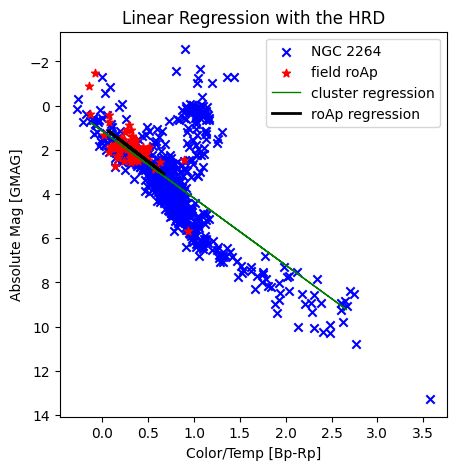

In [6]:
regr = LinearRegression()
regc = LinearRegression()
# Fitting/Training the model
regr.fit(xtrain_r,ytrain_r)
regc.fit(xtrain_c,ytrain_c)
# Predictions
data_r_pred = regr.predict(xtest_r)
data_c_pred = regc.predict(xtest_c)

# The coefficients
print(f"Coefficient for roAp or slope(m) in y = mx+b: {regr.coef_}")
print(f"Coefficient for cluster or slope(m) in y = mx+b: {regc.coef_}")
# The mean squared error
print("\nMean squared error for roAp: %.2f" % mean_squared_error(ytest_r, data_r_pred ))
print("Mean squared error for cluster: %.2f" % mean_squared_error(ytest_c, data_c_pred ))
# The coefficient of determination: 1 is perfect prediction
print("\nCoefficient of determination for roAp: %.2f" % r2_score(ytest_r, data_r_pred ))
print("Coefficient of determination for cluster: %.2f" % r2_score(ytest_c, data_c_pred ))

plt.figure(figsize=(5,5))
plt.title('Linear Regression with the HRD')
plt.scatter(x=xtrain_c,y=ytrain_c,marker='x', c='b', label='NGC 2264')
plt.scatter(x=xtrain_r,y=ytrain_r,marker='*', c='r', label='field roAp')
plt.gca().invert_yaxis()
plt.plot(xtest_c,data_c_pred,c='green',linewidth=1,label='cluster regression')
plt.plot(xtest_r,data_r_pred,c='black',linewidth=2,label='roAp regression')
plt.legend()
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
plt.savefig('Figures/LinearRegHRD-both')

### 4. Training and plotting the concatenated dataset with the linear regression

Coefficient: or slope(m) in y = mx+b: [1.42648605]

Mean squared error: 2.13

Coefficient of determination: 0.55


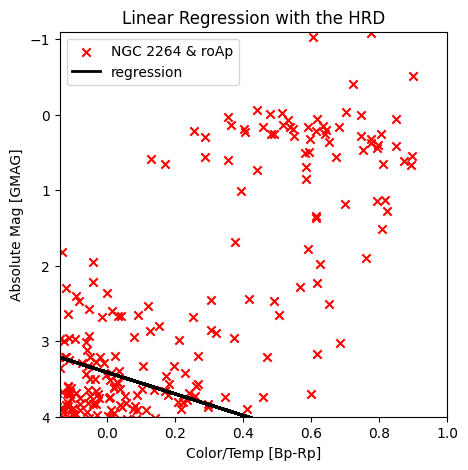

In [13]:
# Calculating the point-density
'''xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]'''

reg = LinearRegression()

# Fitting/Training the model
reg.fit(xtrain,ytrain)
# Predictions
data_y_pred = reg.predict(xtest)

# The coefficients
print(f"Coefficient: or slope(m) in y = mx+b: {reg.coef_}")
# The mean squared error
print("\nMean squared error: %.2f" % mean_squared_error(ytest, data_y_pred ))
# The coefficient of determination: 1 is perfect prediction
print("\nCoefficient of determination: %.2f" % r2_score(ytest, data_y_pred ))

plt.figure(figsize=(5,5))
plt.title('Linear Regression with the HRD')
plt.ylim([-1.1,4])
plt.xlim([-0.14,1])
plt.scatter(xtrain,ytrain,marker='x',c='r',label='NGC 2264 & roAp')
plt.gca().invert_yaxis()
plt.plot(xtest,data_y_pred,c='black',linewidth=2,label='regression')
plt.legend()
plt.ylabel('Absolute Mag [GMAG]')
plt.xlabel('Color/Temp [Bp-Rp]')
plt.savefig('Figures/LinearRegHRD-concat.png')

### 5. Training the K-Nearest-Neighbors (KNN)

In [8]:
rmse = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(xtest,ytest)
    pred = model.predict(xtrain)
    error = np.sqrt(mean_squared_error(ytrain,pred))
    rmse.append(error)
    print(f'RMSE values for k={K} is: {error}')

RMSE values for k=1 is: 1.9404235224769921
RMSE values for k=2 is: 1.7485142280473904
RMSE values for k=3 is: 1.7118748265865467
RMSE values for k=4 is: 1.6384867045924065
RMSE values for k=5 is: 1.5998430784380386
RMSE values for k=6 is: 1.5379637540285143
RMSE values for k=7 is: 1.5071885180459115
RMSE values for k=8 is: 1.476709964809561
RMSE values for k=9 is: 1.4562968042535824
RMSE values for k=10 is: 1.4397544131337596
RMSE values for k=11 is: 1.4239436069758489
RMSE values for k=12 is: 1.4155306290801182
RMSE values for k=13 is: 1.4130531745855905
RMSE values for k=14 is: 1.4109372176638995
RMSE values for k=15 is: 1.4059687806806744
RMSE values for k=16 is: 1.4104825091783761
RMSE values for k=17 is: 1.4126669428502978
RMSE values for k=18 is: 1.415635931358549
RMSE values for k=19 is: 1.419211376545751
RMSE values for k=20 is: 1.4282417217188588


<AxesSubplot: >

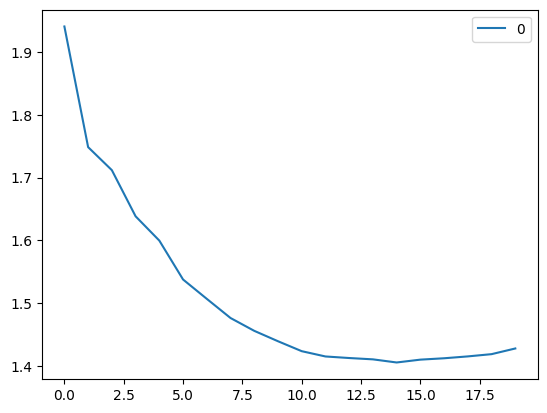

In [9]:
pd.DataFrame(rmse).plot()

In [10]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn,params,cv=5)
model.fit(xtest,ytest)
model.best_params_

{'n_neighbors': 4}

[0.06544447992061597 0.17644454992749337 4.071569902795048
 1.5694479374104746 0.3674655563980269 0.07533126665158907
 3.199706715493055 1.5150337335890418 5.328500524504794
 0.06508486845537931 4.0413630359438715 0.19389790002212004
 0.245375433039551 0.8362396597065633 0.7744315917757438
 1.3210972894522568 1.1526527775574653 0.17192017777632973
 0.256429135058601 0.8730048743813748 1.0887274976014907 0.846097643085411
 2.6330246416752012 0.16802644241941622 0.18675670404958522
 0.5012736697541493 0.2949464417231864 0.37223786627289 4.0413211158654825
 0.4224457025214914 1.0011323466440962 0.41045131058403994
 0.7866060626425813 0.6371317863643722 0.9820558328922306
 0.5635091837327058 1.9807758491176646 0.579808895354964
 0.8687661885828075 0.4708194099689871 1.9355394073707446
 0.7978850288203789 2.4294703000764306 0.6654971233776941
 1.3044891135646726 2.55636659372463 0.6739102557589565
 0.22169211866838268 1.256226158200381 1.0878290489797386
 0.3176909812560633 0.70776660533555

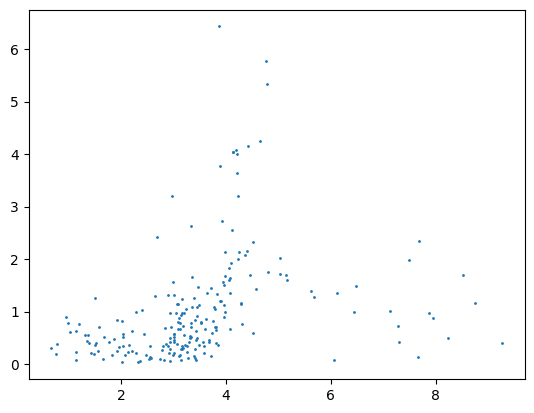

In [11]:
# For field roAp's
regr.fit(xtrain_r,ytrain_r)

predy = reg.predict(xtest)
dist = np.abs(ytest - predy)
print(dist)
plt.scatter(predy, dist, s=1)

In [12]:
print('Stars in NGC 2264 following the regression:')

thresh = 1
for n in range(len(clust)):
    if dist[n]<thresh:
        print(f'ID: {dbc[:,np.newaxis,2]}')

Stars in NGC 2264 following the regression:
ID: [[93]
 [94]
 [95]
 [96]
 [97]
 [98]
 [99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]
 [145]
 [146]
 [147]
 [148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]
 [155]
 [156]
 [157]
 [158]
 [159]
 [160]
 [161]
 [162]
 [163]
 [164]
 [165]
 [166]
 [167]
 [168]
 [169]
 [170]
 [171]
 [172]
 [173]
 [174]
 [175]
 [176]
 [177]
 [178]
 [179]
 [180]
 [181]
 [182]
 [183]
 [184]
 [185]
 [186]
 [187]
 [188]
 [189]
 [190]
 [191]
 [192]
 [193]
 [194]
 [195]
 [196]
 [197]
 [198]
 [199]
 [200]
 [201]
 [202]
 [203]
 [204]
 [205]
 [206]
 [207]
 [208]
 [209]
 [210]
 [211]
 [212]
 [213]
 [214]
 [215]
 [216]
 [217]
 [218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]
 [225]
 [226]
 [227]
 [228]
 [229]


IndexError: index 212 is out of bounds for axis 0 with size 212